# Centro de control y prevención de enfermaedades de EE.UU
Proyecto individual 2 

In [1]:
import requests
import json 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from requests.structures import CaseInsensitiveDict

In [2]:
from sodapy import Socrata

In [3]:
client = Socrata('healthdata.gov',
                app_token='3N0D0sAi0KAWHdf4oNiLe580m',
                username="lizlibre6@gmail.com",
                password="Camisa1#")
results = client.get("g62h-syeh", limit=50000)
results_df = pd.DataFrame.from_records(results)

In [4]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47909 entries, 0 to 47908
Columns: 134 entries, state to previous_day_admission_pediatric_covid_confirmed_5_11
dtypes: object(134)
memory usage: 49.0+ MB


In [5]:
reporte_filtrado=results_df.loc[:,['state','date','hospital_onset_covid_coverage','staffed_icu_adult_patients_confirmed_covid','staffed_icu_pediatric_patients_confirmed_covid','inpatient_beds_used_covid','deaths_covid','inpatient_beds_utilization','total_staffed_pediatric_icu_beds','adult_icu_bed_utilization','staffed_pediatric_icu_bed_occupancy','all_pediatric_inpatient_beds','all_pediatric_inpatient_bed_occupied','total_staffed_adult_icu_beds','critical_staffing_shortage_today_yes']]

In [6]:
reporte_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47909 entries, 0 to 47908
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   state                                           47909 non-null  object
 1   date                                            47909 non-null  object
 2   hospital_onset_covid_coverage                   47909 non-null  object
 3   staffed_icu_adult_patients_confirmed_covid      40943 non-null  object
 4   staffed_icu_pediatric_patients_confirmed_covid  17760 non-null  object
 5   inpatient_beds_used_covid                       47825 non-null  object
 6   deaths_covid                                    47220 non-null  object
 7   inpatient_beds_utilization                      47644 non-null  object
 8   total_staffed_pediatric_icu_beds                39593 non-null  object
 9   adult_icu_bed_utilization                       40

In [7]:
reporte_filtrado=reporte_filtrado.fillna(0)

In [8]:
reporte_filtrado['hospital_onset_covid_coverage'] = reporte_filtrado['hospital_onset_covid_coverage'].astype(int, errors = 'raise')
reporte_filtrado['staffed_icu_adult_patients_confirmed_covid'] = reporte_filtrado['staffed_icu_adult_patients_confirmed_covid'].astype(int, errors = 'raise')
reporte_filtrado['staffed_icu_pediatric_patients_confirmed_covid'] = reporte_filtrado['staffed_icu_pediatric_patients_confirmed_covid'].astype(int, errors = 'raise')
reporte_filtrado['inpatient_beds_used_covid'] = reporte_filtrado['inpatient_beds_used_covid'].astype(int, errors = 'raise')
reporte_filtrado['deaths_covid'] = reporte_filtrado['deaths_covid'].astype(int, errors = 'raise')
reporte_filtrado['total_staffed_pediatric_icu_beds'] = reporte_filtrado['total_staffed_pediatric_icu_beds'].astype(int, errors = 'raise')
reporte_filtrado['staffed_pediatric_icu_bed_occupancy'] = reporte_filtrado['staffed_pediatric_icu_bed_occupancy'].astype(int, errors = 'raise')
reporte_filtrado['all_pediatric_inpatient_beds'] = reporte_filtrado['all_pediatric_inpatient_beds'].astype(int, errors = 'raise')
reporte_filtrado['all_pediatric_inpatient_bed_occupied'] = reporte_filtrado['all_pediatric_inpatient_bed_occupied'].astype(int, errors = 'raise')
reporte_filtrado['total_staffed_adult_icu_beds'] = reporte_filtrado['total_staffed_adult_icu_beds'].astype(int, errors = 'raise')
reporte_filtrado['critical_staffing_shortage_today_yes'] = reporte_filtrado['critical_staffing_shortage_today_yes'].astype(float, errors = 'raise')
reporte_filtrado['inpatient_beds_utilization'] = reporte_filtrado['inpatient_beds_utilization'].astype(float, errors = 'raise')
reporte_filtrado['adult_icu_bed_utilization'] = reporte_filtrado['adult_icu_bed_utilization'].astype(float, errors = 'raise')

In [9]:
reporte_filtrado['date'] = pd.to_datetime(reporte_filtrado['date'])

1. ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [11]:
pregunta1=reporte_filtrado[reporte_filtrado['date']<='2020-07']
pregunta1=pregunta1.groupby(['state']).agg({'inpatient_beds_used_covid':'sum',
                                        'inpatient_beds_utilization':'mean',
                                        'staffed_icu_adult_patients_confirmed_covid':'sum',
                                        'staffed_icu_pediatric_patients_confirmed_covid':'sum'})
respuesta1=pregunta1.sort_values('inpatient_beds_used_covid',ascending=False).head(5)
respuesta11=pregunta1.sort_values('inpatient_beds_utilization',ascending=False).head(5)

In [12]:
respuesta1

,inpatient_beds_used_covid,inpatient_beds_utilization,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid
state,,,,
NY,687963,0.694415,0,0
CA,441543,0.553851,0,0
FL,329651,0.566124,0,0
TX,253496,0.645170,0,0
IL,215590,0.531491,0,0


In [13]:
respuesta11

,inpatient_beds_used_covid,inpatient_beds_utilization,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid
state,,,,
VI,151,0.782351,0,0
MD,122220,0.745799,0,0
AZ,149910,0.738896,0,0
NC,68043,0.735011,0,0
RI,22040,0.728551,0,0


2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:
- Intervalos de crecimiento y decrecimiento
- Puntos críticos (mínimos y máximos)

In [14]:
pregunta2=reporte_filtrado[reporte_filtrado['state']=='NY']
pregunta2=pregunta2[(reporte_filtrado['date']>='2020-03-22') & (reporte_filtrado['date']<='2020-05-28')]
repuesta2=pregunta2.loc[:,['state','date','inpatient_beds_utilization','inpatient_beds_used_covid']]

C:\Users\lizeh\AppData\Local\Temp\ipykernel_4356\527397335.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pregunta2=pregunta2[(reporte_filtrado['date']>='2020-03-22') & (reporte_filtrado['date']<='2020-05-28')]


<AxesSubplot:xlabel='date'>

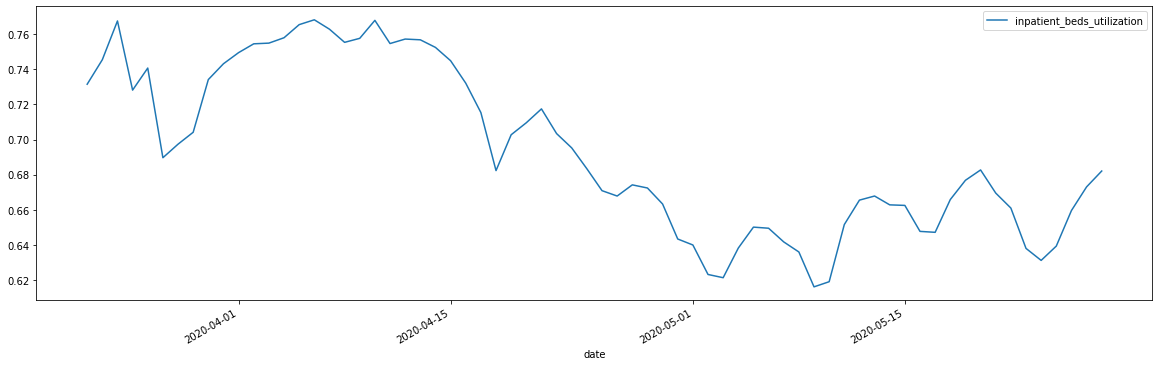

In [15]:
repuesta2.plot('date','inpatient_beds_utilization',figsize=(20,6))

In [16]:
repuesta2['inpatient_beds_used_covid'].max()

14126

3.¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020?

In [30]:
pregunta3=reporte_filtrado[reporte_filtrado['date']<'2021']
pregunta3=pregunta3.loc[:,['state','date','adult_icu_bed_utilization','total_staffed_pediatric_icu_beds','staffed_pediatric_icu_bed_occupancy']]
pregunta3['utilitation_uci_pediatric']=pregunta3['staffed_pediatric_icu_bed_occupancy'] / pregunta3['total_staffed_pediatric_icu_beds']
pregunta3['Total']=pregunta3['utilitation_uci_pediatric']+pregunta3['adult_icu_bed_utilization']
pregunta3.drop(['total_staffed_pediatric_icu_beds','staffed_pediatric_icu_bed_occupancy'],axis=1,inplace=True)
respuesta3=pregunta3.groupby(['state']).agg({'adult_icu_bed_utilization':'mean',
                                        'utilitation_uci_pediatric':'mean',
                                        'Total':'mean'})

In [31]:
respuesta3.sort_values('Total',ascending=False).head(5)

,adult_icu_bed_utilization,utilitation_uci_pediatric,Total
state,,,
AK,0.381624,1.523642,2.161178
TX,0.388276,1.202909,2.038845
IN,0.309616,1.012476,1.679062
SC,0.412285,0.908567,1.648254
DC,0.432946,0.776318,1.492411


In [18]:
respuesta3.sort_values('adult_icu_bed_utilization',ascending=False).head(5)

,adult_icu_bed_utilization,utilitation_uci_pediatric
state,,
IA,0.569445,0.087500
GA,0.465654,0.561684
MS,0.465581,0.318650
DE,0.458249,0.665367
RI,0.457329,NaN


In [19]:
respuesta3.sort_values('utilitation_uci_pediatric',ascending=False).head(5)

,adult_icu_bed_utilization,utilitation_uci_pediatric
state,,
AK,0.381624,1.523642
TX,0.388276,1.202909
IN,0.309616,1.012476
SC,0.412285,0.908567
DC,0.432946,0.776318


4.¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [20]:
pregunta4=reporte_filtrado[reporte_filtrado['date']<'2021']
pregunta4=pregunta4.loc[:,['state','date','all_pediatric_inpatient_bed_occupied','all_pediatric_inpatient_beds']]
pregunta4['utilization_pediatric']=pregunta4['all_pediatric_inpatient_bed_occupied']/pregunta4['all_pediatric_inpatient_beds']
pregunta4['utilization_pediatric']=round(pregunta4['utilization_pediatric'],3)
respuesta4=pregunta4.groupby(['state']).agg({'all_pediatric_inpatient_bed_occupied':'max',
                                        'all_pediatric_inpatient_beds':'max',
                                        'utilization_pediatric':'mean'})


In [21]:
respuesta4

,all_pediatric_inpatient_bed_occupied,all_pediatric_inpatient_beds,utilization_pediatric
state,,,
AK,150,295,0.965400
AL,87,96,NaN
AR,1008,1875,0.462406
AZ,1281,1697,1.158400
CA,3606,6330,0.579288
CO,899,1433,0.548341
CT,453,864,0.622871
DC,580,835,NaN
DE,346,650,NaN


5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [22]:
pregunta5=reporte_filtrado.loc[:,['state','date','staffed_icu_adult_patients_confirmed_covid','staffed_icu_pediatric_patients_confirmed_covid','total_staffed_adult_icu_beds','total_staffed_pediatric_icu_beds']]
pregunta5['total_confirmed_patients']=pregunta5['staffed_icu_adult_patients_confirmed_covid']+pregunta5['staffed_icu_pediatric_patients_confirmed_covid']
pregunta5['total_icu_beds']=pregunta5['total_staffed_adult_icu_beds']+pregunta5['total_staffed_pediatric_icu_beds']
pregunta5['porcentaje_icu_beds_covid']=pregunta5['total_confirmed_patients']/pregunta5['total_icu_beds']
pregunta5.drop(['staffed_icu_adult_patients_confirmed_covid','staffed_icu_pediatric_patients_confirmed_covid','total_staffed_adult_icu_beds','total_staffed_pediatric_icu_beds'],axis=1,inplace=True)
respuesta5=pregunta5.groupby(['state']).mean()

In [23]:
respuesta5

,total_confirmed_patients,total_icu_beds,porcentaje_icu_beds_covid
state,,,
AK,13.076923,150.366246,NaN
AL,230.964323,1255.655824,NaN
AR,159.565315,1102.038288,0.140825
AS,0.005682,6.997159,0.000812
AZ,268.692825,1869.710762,0.150980
CA,1011.695991,8208.590200,0.119168
CO,169.688636,1385.914773,0.118838
CT,68.455479,1076.831050,0.067496
DC,25.421478,361.822171,NaN


6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

<AxesSubplot:xlabel='state'>

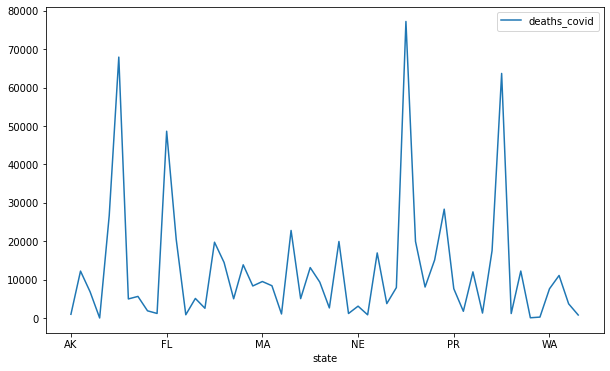

In [24]:
pregunta6=reporte_filtrado[(reporte_filtrado['date']>='2021')& (reporte_filtrado['date']<'2022')]
pregunta6=reporte_filtrado.loc[:,['state','deaths_covid']]
respuesta6=pregunta6.groupby(['state']).sum()
respuesta6.plot(figsize=(10,6))

In [27]:
respuesta6[respuesta6['deaths_covid']==respuesta6['deaths_covid'].max()]

,deaths_covid
state,
NY,77230


7. ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

<AxesSubplot:xlabel='date'>

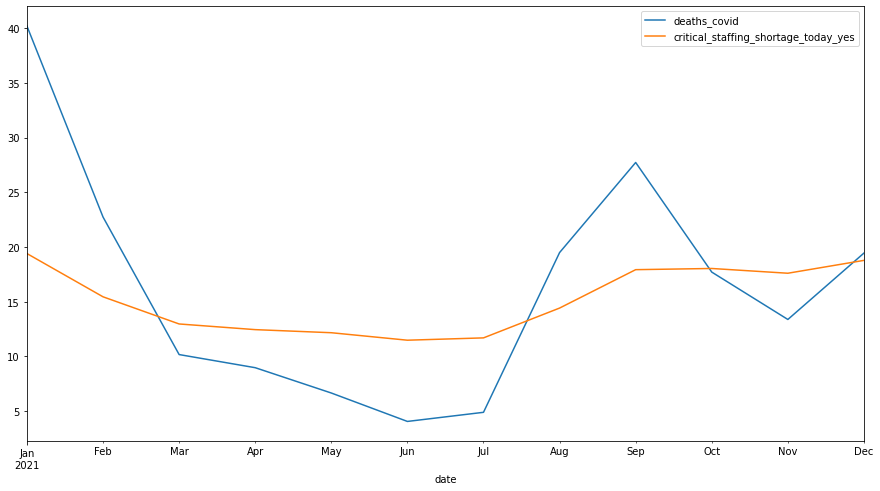

In [32]:
pregunta7=reporte_filtrado[(reporte_filtrado['date']>='2021')& (reporte_filtrado['date']<'2022')]
pregunta7=pregunta7.loc[:,['date','deaths_covid','critical_staffing_shortage_today_yes']]
pregunta7.index=pregunta7['date']
pregunta7=pregunta7.resample('M').mean()
pregunta7.plot(figsize=(15,8))

8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias

In [33]:
pregunta8=reporte_filtrado.loc[:,['date','deaths_covid','critical_staffing_shortage_today_yes']]
pregunta8.index=pregunta8['date']
pregunta8=pregunta8.resample('M').mean()

In [34]:
pregunta8[pregunta8['deaths_covid']==pregunta8['deaths_covid'].max()]

,deaths_covid,critical_staffing_shortage_today_yes
date,,
2021-01-31,40.182593,19.3944


In [35]:
pregunta8[pregunta8['critical_staffing_shortage_today_yes']==pregunta8['critical_staffing_shortage_today_yes'].max()]

,deaths_covid,critical_staffing_shortage_today_yes
date,,
2020-12-31,34.494218,22.797322


<AxesSubplot:xlabel='date'>

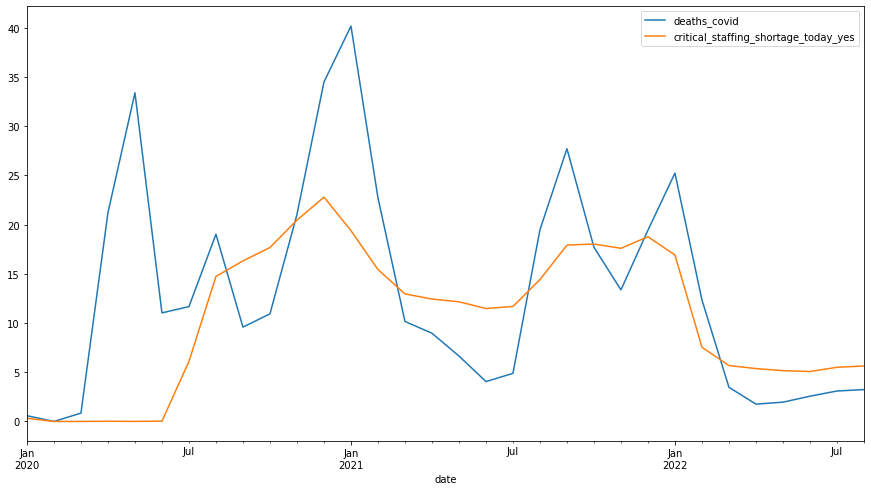

In [36]:
pregunta8.plot(figsize=(15,8))